# Rafiu Ali
rafiuali2002@gmail.com

# ChatGPT sentiment analysis
https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the dataset from the CSV file
data = pd.read_csv("D:\\Datascience jpy\\Sentiment analysis\\ChatGPT sentiment analysis.csv")

In [3]:
# Display total rows and columns of dataset
print(f"Total Rows and Columns in Training Data: {data.shape}")

Total Rows and Columns in Training Data: (219294, 3)


In [4]:
# Display the columns of the dataset
print(data.columns)

Index(['Unnamed: 0', 'tweets', 'labels'], dtype='object')


In [5]:
# Display the first few rows of the dataset
print(data.head())

   Unnamed: 0                                             tweets   labels
0           0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1           1  Try talking with ChatGPT, our new AI system wh...     good
2           2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3           3  THRILLED to share that ChatGPT, our new model ...     good
4           4  As of 2 minutes ago, @OpenAI released their ne...      bad


In [6]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0    0
tweets        0
labels        0
dtype: int64


In [7]:
# Get basic statistics and information about the dataset
print(data.describe())
print(data.info())

          Unnamed: 0
count  219294.000000
mean   109646.500000
std     63304.869303
min         0.000000
25%     54823.250000
50%    109646.500000
75%    164469.750000
max    219293.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB
None


In [8]:
# Data Cleaning
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove special characters and numbers
    text = re.sub(r'\W+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

data['tweets'] = data['tweets'].apply(clean_text)

In [9]:
# Tokenize and remove stop words
stopwords = set(STOPWORDS)
data['tweets'] = data['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [10]:
# Display cleaned data
print(data.head())

   Unnamed: 0                                             tweets   labels
0           0        chatgpt optimizing language models dialogue  neutral
1           1  try talking chatgpt new ai system optimized di...     good
2           2  chatgpt optimizing language models dialogue ai...  neutral
3           3  thrilled share chatgpt new model optimized dia...     good
4           4  2 minutes ago released new chatgpt n nand use ...      bad


In [11]:
# Check for duplicates
duplicates = data.duplicated()
duplicate_rows = data[duplicates]
print(duplicate_rows)
print(f'Number of duplicate rows: {duplicates.sum()}')

Empty DataFrame
Columns: [Unnamed: 0, tweets, labels]
Index: []
Number of duplicate rows: 0


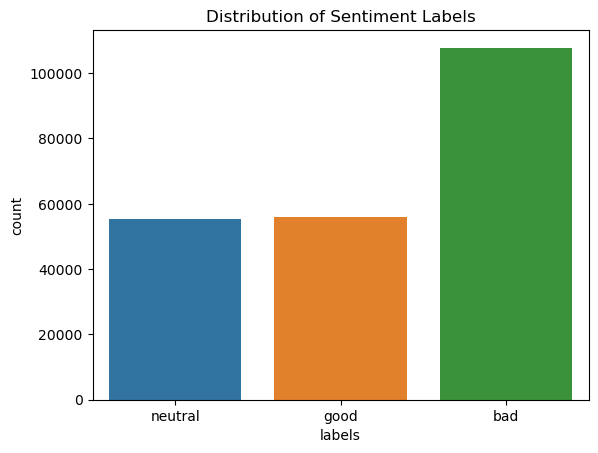

In [12]:
# Visualize the distribution of labels
sns.countplot(x='labels', data=data)
plt.title('Distribution of Sentiment Labels')
plt.show()

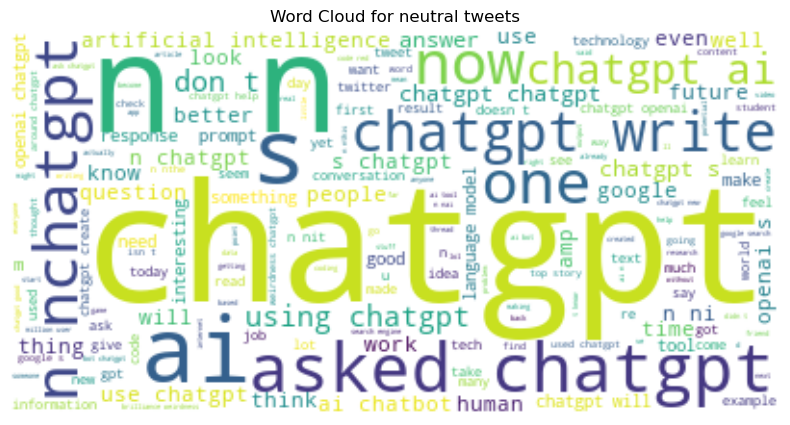

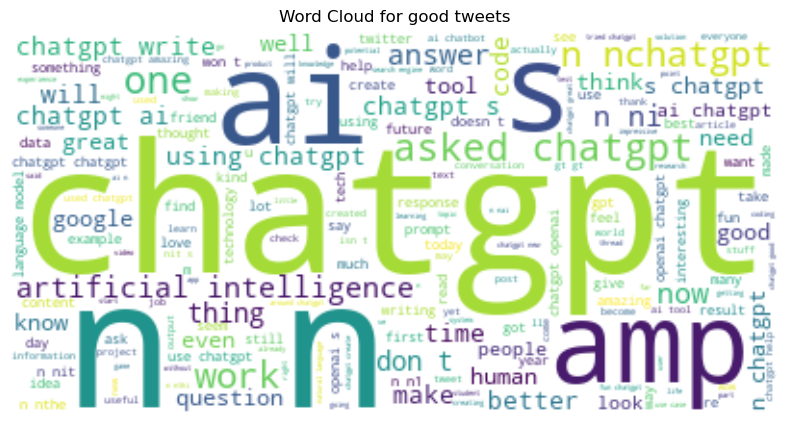

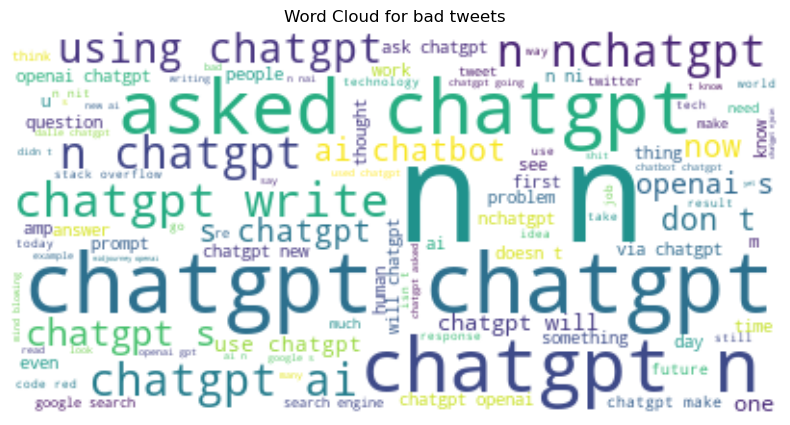

In [13]:
# Generate word clouds for each sentiment category
for label in data['labels'].unique():
    text = ' '.join(data[data['labels'] == label]['tweets'])
    wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label} tweets')
    plt.axis('off')
    plt.show()

In [14]:
# Feature Extraction using sparse matrices
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['tweets'])
y = data['labels']

In [15]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Model Building
model = LogisticRegression(max_iter=1000)

In [17]:
# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.82665945 0.82155784 0.82543392 0.82221336 0.8245504 ]
Average cross-validation score: 0.824082993701371


In [18]:
# Training the model on the full training set
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.86      0.94      0.90     21474
        good       0.84      0.81      0.82     11204
     neutral       0.73      0.63      0.68     11181

    accuracy                           0.83     43859
   macro avg       0.81      0.79      0.80     43859
weighted avg       0.82      0.83      0.82     43859

[[20209   310   955]
 [  564  9055  1585]
 [ 2709  1469  7003]]


In [20]:
# Prediction
new_tweets = ["I love using ChatGPT!", "ChatGPT is not helpful at all."]
new_tweets_cleaned = [clean_text(tweet) for tweet in new_tweets]
new_tweets_vectorized = tfidf.transform(new_tweets_cleaned)
predictions = model.predict(new_tweets_vectorized)
print(predictions)

['good' 'neutral']


In [21]:
# Hyperparameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 10, 'solver': 'lbfgs'}


In [22]:
# Trying a different model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         bad       0.86      0.90      0.88     21474
        good       0.73      0.79      0.76     11204
     neutral       0.70      0.58      0.63     11181

    accuracy                           0.79     43859
   macro avg       0.76      0.76      0.76     43859
weighted avg       0.79      0.79      0.79     43859

